# Eigenvalues and Eigenvectors: Application to Data Prblems

Eigenvectors are particular vectors that are unrotated by a transformation matrix, and eigenvalues are the amount by which the eigenvectors are stretched. These special 'eigen-things' are very useful in linear algebra and will let us examine Google's famous PageRank algorithm for presenting web search results. Then we'll apply this in code, which will wrap up the course.

**Goals：**

1. Identify geometrically what an eigenvector/value is

2. Apply mathematical formulation in simple cases

3. Build an intuition of larger dimention eigensystems

4. Write code to solve a large dimentional eigen problem

## What is eigen-things?

We have already talked about transformations like scaling, rotation and shears. Now imagine we have a vertical vector, a diagnal vector and a horizontal vector in a plane. If we do the vertical scaling to the plane, besides the horizontal and vertical vectors, any other vectors' direction would have been changed by this vertical scaling. So in some sense, the horizontal and vertical vectors are special, they are **characteristic** of this particular transform, which is why we refer to them as **eigenvectors**.

Furthermore, because the horizontal vectors' length was unchanged, we say that it has a corresponding eigenvalue of one whereas, the vertical eigenvector doubled in length, so we say it has an eigenvalue of two. So, from a conceptual perspective, that's about it, for 2D eigen-problems, we simply take a transform and we look for the vectors who are still laying on the same span as before, and then we measure how much their length has changed. This is basically **what eigenvectors and their corresponding eigenvalues are**. 

So basically, **eigenvectors are those which lie along the same span both before and after applying a linear transform to a space.And then, eigenvalues are simply the amount that each of those vectors has been stretched in the process.**

## Get to know the detail of eigenproblems

### Special Eigen-cases

**Case 1**

The first example we're going to consider is that of a uniform scaling, which is where we scale by the same amount in each direction. 

As you will hopefully have spotted, not only are all three of the vectors that I've highlighted eigenvectors, but in fact, for a uniform scaling, any vector would be an eigenvector. 

**Case 2**

Rotation 180 degrees.

As you can see, the three eigenvectors are still laying on the same spans as before, but just pointing in the opposite direction.This means that once again, all vectors for this transform are eigenvectors, and they all have eigenvalues of minus one, which means that although the eigenvectors haven't changed length, they are all now pointing in the opposite direction. 

**Case 3**

In 3D world, if we find the eigenvector of a 3D rotation, it means we've also found the axis of rotation. 

### Calculating Eigenvectors

Goal: we're going to formalise this concept into an algebraic expression, which will allow us to calculate eigenvalues and eigenvectors whenever they exist.

$$Ax = \lambda{x}$$
$$(A-\lambda{x})x = 0$$
$$det(A-\lambda{x}) = 0$$
if we set the transform matrix $A = \begin{pmatrix}a&b\\c&d\end{pmatrix}$
$$det(\begin{pmatrix}a&b\\c&d\end{pmatrix} - \begin{pmatrix}\lambda&0\\0&\lambda\end{pmatrix})$$
$$\lambda^2 - (a+b)\lambda + ab-dc = 0$$

**Example 1**

if we set the transform matrix $A = \begin{pmatrix}1&0\\0&2\end{pmatrix}$

so $det\begin{pmatrix}1-\lambda&0\\0&2-\lambda\end{pmatrix} = (1-\lambda)(2-\lambda) = 0$

and since we know $(A-\lambda{I})x = 0$

$@\lambda=1$, $\begin{pmatrix}1-1&0\\0&2-1\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}0&0\\0&1\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}0\\x_2\end{pmatrix} = 0$

$@\lambda=2$, $\begin{pmatrix}1-2&0\\0&2-2\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}1&0\\0&0\end{pmatrix}\begin{pmatrix}x_1\\x_2\end{pmatrix} = \begin{pmatrix}x_1\\0\end{pmatrix} = 0$

so: $@\lambda=1: x=\begin{pmatrix}t\\0\end{pmatrix}$, $@\lambda=2: x=\begin{pmatrix}0\\t\end{pmatrix}$

**Example 2**

if we set the transform matrix $A = \begin{pmatrix}0&-1\\1&0\end{pmatrix}$

so $det\begin{pmatrix}0-\lambda&-1\\1&0-\lambda\end{pmatrix} = \lambda^2+1 = 0$

Which doesn't have any real numbered solutions at all. Hence, no real eigenvectors. We can still calculate some complex eigenvectors using imaginary numbers, but this is beyond what we need for this particular course. 

**we never consider the zero-vector as an eigenvector of a matrix.**

## When changing to the eigenbasis is really useful

### Changing to the eigenbasis

For a diagnal matrix, for example $a = \begin{pmatrix}2&0\\0&2\end{pmatrix}$

$a^3 = \begin{pmatrix}8&0\\0&8\end{pmatrix}$All you need to do is put each of the terms on the diagonal to the power of n and you've got the answer.

For diagnal matrix $T = \begin{pmatrix}a&0&0\\0&b&0\\0&0&c\end{pmatrix}$, $T^n = \begin{pmatrix}a^n&0&0\\0&b^n&0\\0&0&c^n\end{pmatrix}$

But what if T is not a diagnal matrix? Calculating $T^n$ will be so much complex.

Essentially, what we're going to do is simply change to a basis where our transformation T becomes diagonal, which is what we call an eigen-basis. We can then easily apply our power of n to the diagonalized form, and finally transform the resulting matrix back again. (giving us T to the power of n, but avoiding much of the work. )

If we have $C = \begin{pmatrix}x_1&x_2&x_3\\.&.&.\\.&.&.\\.&.&.\end{pmatrix}$, $D = \begin{pmatrix}\lambda_1&0&0\\0&\lambda_2&0\\0&0&\lambda_3\end{pmatrix}$, $T = \begin{pmatrix}a&0&0\\0&b&0\\0&0&c\end{pmatrix}$

We will have $$T = CDC^{-1}$$
$$T2 = CDC^{-1}CDC^{-1} = CD^2C^{-1}$$
so $$T^n = CD^nC^{-1}$$

We now have method:
The normal but complex way to calculate $T^n$: $$v \implies T^n.v \implies T^nv$$
The simple and fast way to calculate $T^n$: $$v \implies C^{-1}v \implies 	[ \,v] \,_E \implies D^n [ \,v	] \,_E \implies [ \,T^nv	] \,_E \implies C[ \,T^nv	] \,_E \implies T^nv$$

### Eigenbasis Example

For example, we have $T = \begin{pmatrix}1&1\\0&2\end{pmatrix}$

And we found that eigenbasis of T are: $@\lambda=1: x=\begin{pmatrix}1\\0\end{pmatrix};@\lambda=2: x=\begin{pmatrix}1\\1\end{pmatrix}$

So $C = \begin{pmatrix}1&1\\0&1\end{pmatrix}$, $C^{-1} = \begin{pmatrix}1&-1\\0&1\end{pmatrix}$(Remeber that C is the matrix constructed by eigenbasis of T)

To calculate the diagnal matrix D of T: $D = C^{-1}TC$

So $$T^2 = CDC^{-1} = \begin{pmatrix}1&1\\0&1\end{pmatrix}\begin{pmatrix}1&0\\0&2\end{pmatrix}\begin{pmatrix}1&-1\\0&1\end{pmatrix}$$(Remaber that D is the diagnal matrix of T)

$T^2 = \begin{pmatrix}1&3\\0&4\end{pmatrix}$

And if we use the original T to calculate $T^2 = \begin{pmatrix}1&1\\0&2\end{pmatrix}^2 = \begin{pmatrix}1&3\\0&4\end{pmatrix}$

### Visualising Matrices and  Eigen

## Making the Google PageRank algorithm

This algorithm was famously published by and named after Google founder Larry Page and colleagues in 1998. And was used by Google to help them decide which order to display their websites when they returned from search.

 The central assumption underpinning page rank is that the importance of a website is related to its links to and from other websites, and somehow Eigen theory comes up. 

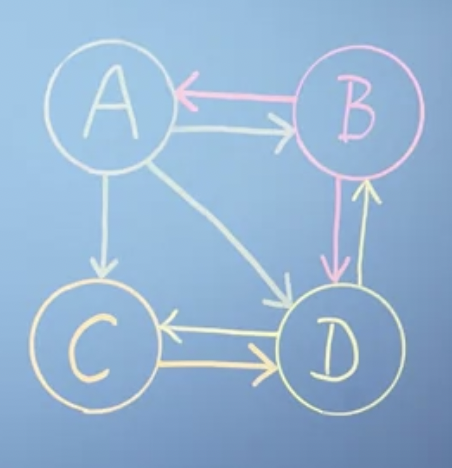

In [3]:
from PIL import Image
pagerank = Image.open("pagerank.png")
pagerank

This bubble diagram represents a model mini Internet, where each bubble is a webpage and each arrow from A, B, C, and D represents a link on that webpage which takes you to one of the others. We're trying to build an expression that tells us, based on this network structure, which of these webpages is most relevant to the person who made the search. As such, we're going to use the concept of Procrastinating Pat who is an imaginary person who goes on the Internet and just randomly click links to avoid doing their work. By mapping all the possible links, we can build a model to estimate the amount of time we would expect Pat to spend on each webpage. 

We can describe the links present on page A as a vector, where each row is either a one or a zero based on whether there is a link to the corresponding page. And then normalise the vector by the total number of the links, such that they can be used to describe a probability for that page.

For example, the vector of A will be $A = \begin{pmatrix}0&1&1&1\end{pmatrix}$
Because vector A has links to sites B, to C, and to D, but it doesn't have a link to itself. Also, because there are three links in this page in total, we would normalize by a factor of a third. So the total click probability sums to one. 

So the vector of A will be $L_A = \begin{pmatrix}0&\frac{1}{3}&\frac{1}{3}&\frac{1}{3}\end{pmatrix}$

And the vector of B will be $L_B = \begin{pmatrix}\frac{1}{2}&0&0&\frac{1}{2}\end{pmatrix}$

We can now build our link matrix L by using each of our linked vectors as a column:

$$L = \begin{pmatrix}0&\frac{1}{2}&0&0\\\frac{1}{3}&0&0&\frac{1}{2}\\\frac{1}{3}&0&0&\frac{1}{2}\\\frac{1}{3}&\frac{1}{2}&1&0\end{pmatrix}$$

We can now write an expression which summarises the approach. We're going to use the vector r to store the rank of all webpages. To calculate the rank of page A, you need to know three things about all other pages on the Internet. What's your rank? Do you link to page A? And how many outgoing links do you have in total? 

The rank $r = Lr$ which means $r^{i+1} = Lr^i$

Then, each time you multiply r by our matrix L, this gives us an updated value for r. So we can say that r^{i+1} is going to be L times r^i.


Applying this expression repeatedly means that we are solving this problem iteratively. Each time we do this, we update the values in r until, eventually, r stops changing. So now r really does equal Lr. Thinking back to the previous videos in this module, this implies that **r is now an eigenvector of matrix L, with an eigenvalue of 1**.

At this point, you might well be thinking, if we want to multiply r by L many times, perhaps this will be best tackled by applying the diagonalization method that we saw in the last video.

One key aspect of the page rank algorithm that we haven't discussed so far is called the **damping factor, d**.

This adds an additional term to our iterative formula. $r^{i+1} = d(Lr^i) + \frac{1-d}{n}$

d is something between 0 and 1. And you can think of it as 1 minus the probability with which procrastinating Pat suddenly, randomly types in a web address, rather than clicking on a link on his current page. 

The effect that this has on the actual calculation is about finding a compromise between speed and stability of the iterative convergence process. 

## Eigenvalues and Eigenvectors: Assessment